In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Particle Decay

In [2]:
def f(N,t0,lamda_A=0.5,lamda_B=0.3):
    A=N[0]
    B=N[1]
    C=N[0]
    dNAdt=-lamda_A*A
    dNBdt= lamda_A*A  -lamda_B*B
    dNCdt= lamda_B*B
    
    return np.array([dNAdt,dNBdt,dNCdt])



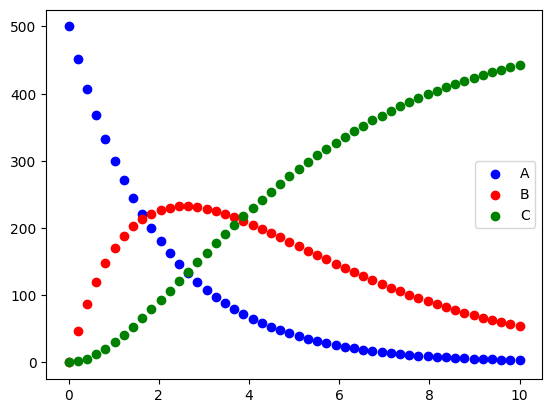

In [3]:
N0=[500,0,0]

t=np.linspace(0,10,50)

sol=odeint(f,N0,t,args=(0.5,0.3))

plt.scatter(t,sol[:,0],color='b',label='A')
plt.scatter(t,sol[:,1],color='red',label='B')
plt.scatter(t,sol[:,2],color='green',label='C')
plt.legend()

### Implemento del paso adaptativo

In [4]:
def Increment(f,r,t,h):
    state1 = np.array([r[0],r[1],r[2]])
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1],r[2]+0.5*h*K1[2]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1],r[2]+0.5*h*K2[2]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1],r[2]+h*K3[2]])
    
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

def Adaptativo(f,r0,t,e=1e-4):
    h = t[1] - t[0]
    
    tf = t[-1]
    t= t[0]
    r=r0
    Vectors=r
    TimeVector = np.array([t])

    
    while t < tf:
        
        r1 = Increment(f,r,t,h)
        r2 = Increment(f,r1,t+h,h)
        rt = Increment(f,r,t,2*h)
        
       
        dx,h= CheckStep(r1,r2,rt,h)
            
        t += h
        
        r = Increment(f,r,t,h)
        
        TimeVector = np.append(TimeVector,t)
        Vectors = np.vstack((Vectors,r))
        
    return TimeVector, Vectors


def CheckStep(r1,r2,rt,h,e=1e-4):
    
    
    error = np.linalg.norm( r2 - rt )
        
    if error < e:
        h=2*h
        dx = rt
        
        
    else:
       q = 0.85*(e/error)**(1/4)
       h = h*q
       dx=0
            
    return dx,h

    

### Ejecucion del codigo

In [5]:
r0=np.array([500.,0.,0.])
t1,x1 = Adaptativo(f,r0,t)
print(len(t1))



57


57


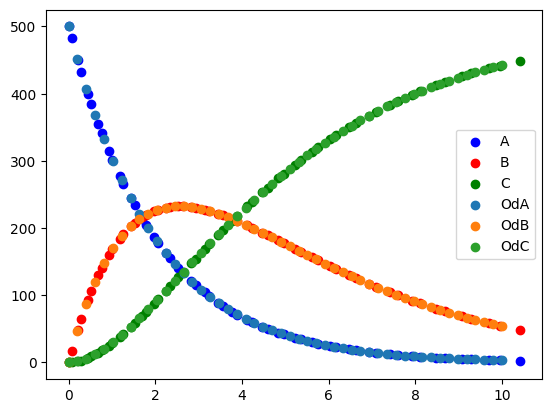

In [6]:
plt.scatter(t1,x1[:,0],color='b',label='A')
plt.scatter(t1,x1[:,1],color='red',label='B')
plt.scatter(t1,x1[:,2],color='green',label='C')
plt.scatter(t,sol[:,0],label='OdA')
plt.scatter(t,sol[:,1],label='OdB')
plt.scatter(t,sol[:,2],label='OdC')
plt.legend()

print(len(t1))

In [7]:
B=x1[:,1]
C=x1[:,2]
cantidad=0
tiempo=0

for t,i in enumerate(range(1,len(B)-1)):
    
    if B[i-1] < B[i] > B[i+1]:
        
        tiempo=t1[t]
        cantidad=B[i]
        break
    
    
print(f'En el tiempo {round(tiempo,3)} la cantidad de particulas de B son maximas, y son: {int(cantidad)}')
print(f'La cantidad de particulas C son {int(C[t])}')
    

En el tiempo 2.342 la cantidad de particulas de B son maximas, y son: 232
La cantidad de particulas C son 113
